The Black-Scholes PDE is as follows:
$$
\frac{\partial V}{\partial t} + \frac{1}{2}\sigma^2 S^2 \frac{\partial^2 V}{\partial S^2} + rS\frac{\partial V}{\partial S} - rV = 0
$$
The initial conditions are subject to change depnding on the type of derivative we are trying to compute. For a European call option, an analytical solution exists, and is formalized with the following initial conditions:
$$\begin{equation} \label{eq1}
\begin{split}
C(0, t) &= 0, \; \forall t \in [0, T] \\
C(S,t) &= S - Ke^{-r(T-t)} \text{ as } S \rightarrow \infty\\
C(S,T) &= \text{max}(S-K,0), \; S \in [0, \infty).
\end{split}\end{equation}
$$

<!---The second boundary conditions implies
$$
C(S, t) \rightarrow S \text{ as } S \rightarrow \infty.
$$
--->
We see that a European call option will have value of $0$ except for the moment of expiration, and otherwise follow the price of the stock discounted by the risk-free interest rate. For exercise price $K$, ... 

We transform Black-Scholes PDE into heat equation. Let $\tau = T - t$, $x = \text{ln}(\frac{S}{K})$.
$$
\frac{\partial u}{\partial \tau} = \frac{\sigma^2}{2} \frac{\partial^2 u}{\partial x^2}, \; x \in (-\infty, \infty), \; \tau \in (0, T)\\
u(x, 0) = e^{\alpha x} V_0(K e^{x})
$$
????

In [62]:
using LinearAlgebra
using SparseArrays

K = 50 #exercise price
r = 0.04 #interest rate
D = 0.0 #dividend rate
sig = 0.4 #volatility of S
L = 2
n = 20
h = L/n
T = 1
m = 12
k = T/m

function alpha(i)
   return (r * i * dt - sig^2 * i^2 * dt) / 2
end

# alph = (r-D)/(sig^2) - .5
# bet = (r+D)/2 + sig^2/8 + (r-D)^2/(2*sig^2)

function beta(i)
   return 1 + sig^2 * i^2 * dt
end

function gamma(i)
   return -(sig^2 * i^2 * dt + r * i * dt) / 2
end

function matrix_A(dim)
    beta_diag = beta.(1:dim)
    alpha_diag = alpha.(2:dim)
    gamma_diag = gamma.(1:dim-1)
    A = sparse(Tridiagonal(alpha_diag, beta_diag, gamma_diag))
    return A
end

# function func0(S, i)
#     if S == 0
#         return 0
#     else
#         return exp(alpha(i)*S)*(S*exp(r*S) - K*exp(r*S))
#     end
# end

function phi(tau)
    return 0
end

function psi(tau)
    return K*exp(alph*L + bet*tau)*(exp(L-D*tau) - exp(-r*tau))
end

function func0(x)
    return K*exp(alph*x)*max(0, exp(x)-1)
end

# S_pts = collect(0:dS:200)
# u0 = func0.(S_pts, 1:length(S_pts))
# A = matrix_A(length(S_pts))
# delta = 1e-3

x = collect(-L:h:L)
tau = collect(0:k:T)

u0 = func0.(x)
dim = length(u0)
print(dim)

a = -.5*sig^2*k/h^2
b = 1-2*a
A = sparse(Tridiagonal(repeat([a], dim-1), repeat([b], dim), repeat([a], dim-1)))

41

41×41 SparseMatrixCSC{Float64, Int64} with 121 stored entries:
⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠁

In [76]:
K = 100 #exercise price
maxS = 300 #max stock price
r = 0.12 #interest rate
sig = 0.1 #volatility of S
T = 1
dS = 1
dt = 0.01

function alpha(i)
   return (sig^2 * i^2 * dt - r * i * dt) / 2
end

function beta(i)
   return -1/dt - sig^2 * i^2 - r
end

function gamma(i)
   return (sig^2 * i^2 * dt + r * i * dt) / 2
end

function matrix_A(dim)
    beta_diag = beta.(1:dim)
    alpha_diag = alpha.(2:dim)
    gamma_diag = gamma.(1:dim-1)
    A = sparse(Tridiagonal(alpha_diag, beta_diag, gamma_diag))
    return A
end

function terminal(S)
    return max(0, S-K)
end

function func0(S)
    return K*exp(-r*T*terminal(S)-1)
end

S = collect(0:dS:maxS)
tau = collect(0:dt:T)

u0 = convert(Array{Float64}, func0.(S))
print(u0)
dim = length(u0)
A = matrix_A(dim)

function Trapezoid(dt,T,u0,A)
    N = T/dt
    u = copy(u0)
    len = size(A)[1]
    for i = 1:N
        u = (sparse(I, len, len)-dt/2*A)\((sparse(I, len, len)+dt/2*A)*u)
    end
    return u
end

u = Trapezoid(dt,T,u0,A)
#print(u)
# figure(7,figsize=(5,5))
# plot(collect(1:dim), u[:,cnt])
# title("Solution")

[36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235,

301-element Vector{Float64}:
 6.006741227172885e-47
 5.768660863871433e-47
 5.399201636454293e-47
 4.921188881685889e-47
 4.3679844794838836e-47
 3.7752227864776557e-47
 3.1770924545925727e-47
 2.603236329143061e-47
 2.0766334440921588e-47
 1.6126119405562585e-47
 1.2189337831961757e-47
 8.967307698938575e-48
 6.419810408857562e-48
 ⋮
 6.261767395670262e-28
 7.315210145131058e-28
 8.52380143535464e-28
 9.906736569583833e-28
 1.148504187269733e-27
 1.3281676878864955e-27
 1.5321632376753177e-27
 1.7632063169839533e-27
 2.0240957090141723e-27
 2.321688846405676e-27
 2.5869242722614937e-27
 3.7360934874808055e-27

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

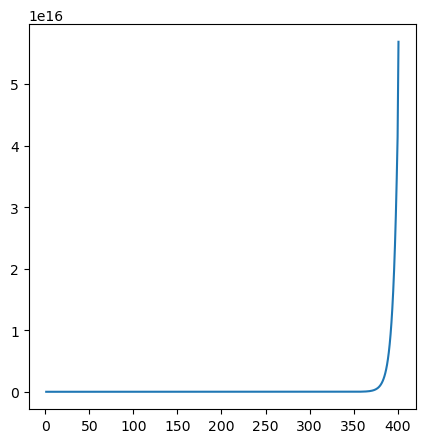

13.387712166388587, 16.259889336933345, 19.717657482016225, 23.882191460034004, 28.899631313876593, 34.94623234587748, 42.23457720320259, 51.02106899785652, 61.61496965456314, 74.38930216410546, 89.79400114037338, 108.3717753536385, 130.7772415356144, 157.80000409528014, 190.39249451517955, 229.7035520216249, 277.11892955628906, 334.3101532587636, 403.2934582094985, 486.50087846541516, 586.8659979734422, 707.9273858807791, 853.9533633015897, 1030.09250073373, 1242.5551525657852, 1498.8324294630768, 1807.9603294574392, 2180.838340833081, 2630.6137505421016, 3173.145208618831, 3827.5618935786997, 4616.937994617749, 5569.1062924265, 6717.639524961192, 8103.034140507017, 9774.13817641601, 11789.873609619295, 14221.313907901938, 17154.190035083153, 20691.913270258297, 24959.221423796283, 30106.577013361333, 36315.472476863215, 43804.829480788365, 52838.71795947585, 63735.667053780584, 76879.89624693191, 92734.86270033458, 111859.60245980443, 134928.44171283572, 162754.77310336503, 196319.73

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.492075041546846e-26, -9.636539871863964e-23, 6.55437

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x000000009B0218B0>

In [104]:
K = 50 #exercise price
r = 0.04 #interest rate
D = 0.12 #dividend rate
sig = 0.4 #volatility of S
L = 50
n = 200
h = L/n
T = 1
m = 12
k = T/m

function funcu(x)
    a = 2*r/sig^2
    return max(exp(1/2*(a+1)*x)-exp(1/2*(a-1)*x), 0)
end

alph = (r-D)/(sig^2) - .5
bet = (r+D)/2 + sig^2/8 + (r-D)^2/(2*sig^2)
x = collect(-L:h:L)
tau = collect(0:k:T)

u0 = funcu.(x)
dim = length(u0)
println(u0)

a = -.5*sig^2*k/h^2
b = 1-2*a
A = sparse(Tridiagonal(repeat([a], dim-1), repeat([b], dim), repeat([a], dim-1)))

function ForwardEuler(dt,T,u0,A)
    u = copy(u0)
    N = T/dt
    for i = 1:N
        u = u + dt*A*u
    end
    return u
end

rv = ForwardEuler(k,T,u0,A)
println(rv)
figure(6,figsize=(5,5))
plot(collect(1:length(rv)), rv)

In [ ]:
function tau(t)
    return T - t
end

function u(tau)
    return C*
end

function x(S,tau)
    return log(S/K) + (r-1/2*sig^2)*tau
end

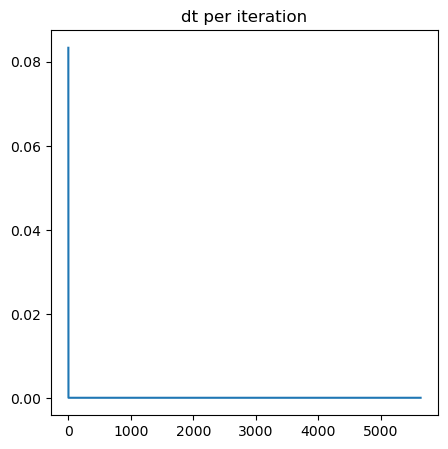

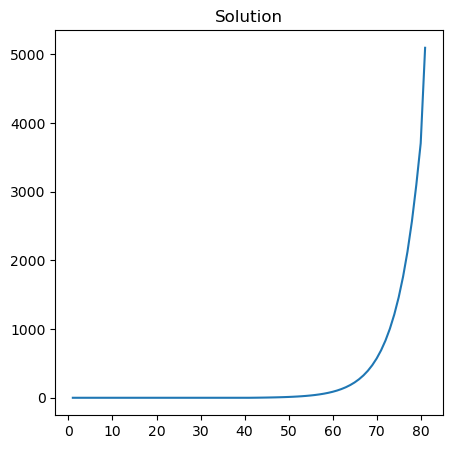

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.26681718660750486, 0.5724945120336059, 0.9260255387798982, 1.3381992335412698, 1.821973829116285, 2.3929275701270587, 3.069802211513212, 3.8751584106254313, 4.836166100410244, 5.985557691811122, 7.362777695973951, 9.015369283617511, 11.000646654250042, 13.387712166388587, 16.259889336933345, 19.717657482016225, 23.882191460034004, 28.899631313876593, 34.94623234587748, 42.23457720320259, 51.02106899785652, 61.61496965456314, 74.38930216410546, 89.79400114037338, 108.3717753536385, 130.7772415356144, 157.80000409528014, 190.39249451517955, 229.7035520216249, 277.11892955628906, 334.3101532587636, 403.2934582094985, 486.50087846541516, 586.8659979734422, 707.9273858807791, 853.9533633015897, 1030.09250073373, 1242.5551525657852, 1498.8324294630768, 1807.9603294574392]


PyObject Text(0.5, 1.0, 'Solution')

In [103]:
K = 50 #exercise price
r = 0.04 #interest rate
D = 0.12 #dividend rate
sig = 0.4 #volatility of S
L = 10
n = 40
h = L/n
T = 1
m = 12
k = T/m

function funcu(x)
    a = 2*r/sig^2
    return max(exp(1/2*(a+1)*x)-exp(1/2*(a-1)*x), 0)
end

alph = (r-D)/(sig^2) - .5
bet = (r+D)/2 + sig^2/8 + (r-D)^2/(2*sig^2)
x = collect(-L:h:L)
tau = collect(0:k:T)

u0 = funcu.(x)
dim = length(u0)
println(u0)

a = -.5*sig^2*k/h^2
b = 1-2*a
A = sparse(Tridiagonal(repeat([a], dim-1), repeat([b], dim), repeat([a], dim-1)))

function prop(T,dt,u0,A)
    u = copy(u0)
    k1 = A*u
    k2 = A*(u + dt*2*k1/3)
    k3 = A*(u + dt*2*k2/3)
    u = u + dt*(k1/4 + 3*k2/4)
    return u
end

function est(T,dt,u0,A)
    u = copy(u0)
    k1 = A*u
    k2 = A*(u + dt*2*k1/3)
    k3 = A*(u + dt*2*k2/3)
    u = u + dt*(k1/4 + 3*k2/8 + 3*k3/8)
    return u
end

function rk23(T,dt,u0,A,delta)
    u = ones(size(A)[1], 1)
    cnt = 1
    t = 0
    dt_arr = [dt]
    u[:,1] = copy(u0)
    t += dt
    curr = u[:,cnt]
    utemp = prop(T,dt,curr,A)
    uest = est(T,dt,curr,A)
    while t <= T
        tau = 1/6*norm(utemp - uest)
        if tau > delta*dt
            dt = dt/2
            utemp = prop(T,dt,curr,A)
            uest = est(T,dt,curr,A)
        elseif tau <= 1/10*delta*dt
            cnt += 1
            t += dt
            dt_arr = vcat(dt_arr, dt)
            u = hcat(u, utemp)
            dt = 2*dt
            curr = u[:,cnt]
            utemp = prop(T,dt,curr,A)
            uest = est(T,dt,curr,A)
        else
            cnt += 1
            t += dt
            dt_arr = vcat(dt_arr, dt)
            u = hcat(u, utemp)
            curr = u[:,cnt]
            utemp = prop(T,dt,curr,A)
            uest = est(T,dt,curr,A)
        end
    end
    return u, dt_arr, cnt
end

using PyPlot

u, dt_arr, cnt = rk23(T,k,u0,A,1e-5)
figure(6,figsize=(5,5))
plot(collect(1:length(dt_arr)), dt_arr)
title("dt per iteration")

figure(7,figsize=(5,5))
plot(collect(1:dim), u[:,cnt])
title("Solution")